### Iris Recognition

This is the main iris recognition function that calls the following subfunctions:

* IrisLocalization
* IrisNormalization
* ImageEnhancement
* FeatureExtraction
* IrisMatching
* PerformanceEvaluation

In [1]:
# import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import fucntions for iris recognition
from IrisLocalization import IrisLocalization
from IrisNormalization import IrisNormalization
from ImageEnhancement import ImageEnhancement
from FeatureExtraction import FeatureExtraction

##

import glob
import math
from scipy.spatial import distance
from sklearn import metrics

In [2]:
os.getcwd()

'/Users/Yo/Dropbox/My Mac (Yos-iMac.lan)/Documents/Iris Recognition'

In [6]:
df = pd.read_csv('img_featues.csv', index_col = 0)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,eyeNum
001_1_1,162.421875,80.737771,144.968750,89.867606,155.187500,78.308260,147.734375,91.759237,171.937500,82.769423,...,45.060482,228.890625,41.192808,224.031250,41.062821,232.812500,34.803410,182.421875,46.941055,1
001_1_2,219.875000,76.585838,235.859375,51.304199,234.484375,48.234775,231.125000,35.562225,230.156250,53.491886,...,49.650881,196.265625,53.247137,220.718750,40.730236,206.453125,40.984726,146.265625,24.203075,1
001_1_3,160.796875,45.123158,244.906250,19.733156,217.312500,37.321607,220.890625,45.691601,235.328125,26.468174,...,40.342564,221.171875,34.992658,216.765625,35.185110,220.906250,39.965500,145.015625,57.472953,1
002_1_1,193.843750,50.765151,238.250000,30.217441,243.718750,32.948572,221.031250,72.609178,246.796875,22.026390,...,27.674941,194.750000,55.292122,237.937500,27.174710,214.281250,36.216135,218.015625,29.526732,2
002_1_2,234.406250,32.521012,237.093750,38.226185,213.609375,58.020367,251.203125,17.002922,237.328125,34.141733,...,66.127110,183.156250,54.037088,228.250000,34.556114,180.390625,44.689420,208.765625,50.745610,2


In [3]:
%%time
# consider each eye in the training sets (three images from all first sessions)
path = "datasets"
dataFolder = "CASIA Iris Image Database (version 1.0)"
escHit = False

features_dict = dict()

for eyeNum in range(1, 108):
    print(eyeNum)
    if eyeNum <= 9:
        eyeId = "00" + str(eyeNum)
    elif 10 <= eyeNum <= 99:
        eyeId = "0" + str(eyeNum)
    else:
        eyeId = str(eyeNum)
        
    imgPath = os.path.join(path, dataFolder, eyeId, "1")
    for sample in range(1,4):   
        imgFilename = eyeId + "_1_" + str(sample) + ".bmp"
        
        # read image and convert to gray scale
        imgName = os.path.join(imgPath, imgFilename)
        img_org = cv2.imread(imgName)
        img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
        
        # pass the gray eye image through the different functions in the iris recognition process
        img_irisLocalized, xy, radii = IrisLocalization(img_gray)
        img_irisNormalized = IrisNormalization(img_gray, xy, radii)
        img_irisEnhanced = ImageEnhancement(img_irisNormalized)
        img_features = FeatureExtraction(img_irisEnhanced)
        features_dict[imgFilename.replace('.bmp', '')] = img_features
        #cv2.imshow(imgFilename, img_irisEnhanced)
        #plt.imshow(img_irisEnhanced, cmap = "gray")
        
#         key = cv2.waitKey(0)
#         if key == 27:
#             cv2.destroyAllWindows()
#             escHit = True
#             break
            
#     if escHit:
#         break
            
#     eyeNum += 1
df = pd.DataFrame(features_dict).T
df.to_csv('img_featues.csv')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
CPU times: user 8min 33s, sys: 2.7 s, total: 8min 36s
Wall time: 7min 50s


In [205]:
%%time
# consider each eye in the training sets (three images from all first sessions)
path = "datasets"
dataFolder = "CASIA Iris Image Database (version 1.0)"
escHit = False

features_dict = dict()

for eyeNum in range(1, 108):
    print(eyeNum)
    if eyeNum <= 9:
        eyeId = "00" + str(eyeNum)
    elif 10 <= eyeNum <= 99:
        eyeId = "0" + str(eyeNum)
    else:
        eyeId = str(eyeNum)
        
    imgPath = os.path.join(path, dataFolder, eyeId, "2")
    for sample in range(1,5):   
        imgFilename = eyeId + "_2_" + str(sample) + ".bmp"
        
        # read image and convert to gray scale
        imgName = os.path.join(imgPath, imgFilename)
        img_org = cv2.imread(imgName)
        img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
        
        # pass the gray eye image through the different functions in the iris recognition process
        img_irisLocalized, xy, radii = IrisLocalization(img_gray)
        img_irisNormalized = IrisNormalization(img_gray, xy, radii)
        img_irisEnhanced = ImageEnhancement(img_irisNormalized)
        img_features = FeatureExtraction(img_irisEnhanced)
        features_dict[imgFilename.replace('.bmp', '')] = img_features
        #cv2.imshow(imgFilename, img_irisEnhanced)
        #plt.imshow(img_irisEnhanced, cmap = "gray")
        
#         key = cv2.waitKey(0)
#         if key == 27:
#             cv2.destroyAllWindows()
#             escHit = True
#             break
            
#     if escHit:
#         break
            
#     eyeNum += 1
df_test = pd.DataFrame(features_dict).T
df_test.to_csv('img_featues_test.csv')



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
CPU times: user 11min 35s, sys: 4.4 s, total: 11min 40s
Wall time: 10min 51s


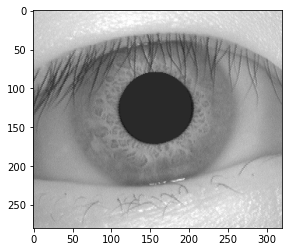

In [29]:
plt.imshow(img_org)

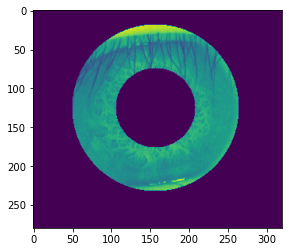

In [28]:
plt.imshow(img_irisLocalized)

In [16]:
len(img_features)

768

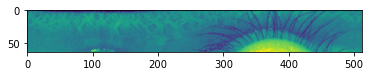

In [27]:
plt.imshow(img_irisNormalized)

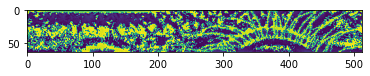

In [26]:
plt.imshow(img_irisEnhanced )

In [20]:
#df = pd.DataFrame(features_dict).T

In [231]:
df_test.shape

(428, 769)

In [232]:
df.shape

(321, 769)

In [225]:
cols = [str(x) for x in df_test.columns]
df_test.columns = cols

In [226]:
eyeNum = [int(x[:3]) for x in df.index]
df['eyeNum'] = eyeNum

In [227]:
eyeNum = [int(x[:3]) for x in df_test.index]
df_test['eyeNum'] = eyeNum

In [238]:
df = pd.concat([df, df_test])

In [242]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy

x_coordinate = df.values[ :, :-1]
y_coordinate =  df.values[ :, -1:]
#print(x_coordinate.shape)



x_coordinate_real = x_coordinate[321:]
y_coordinate_real = y_coordinate[321:]

x_coordinate_train = x_coordinate[:321]
y_coordinate_train =y_coordinate[:321]


In [243]:
print(x_coordinate_train.shape)
print(x_coordinate_real.shape)


data_classification = tree.DecisionTreeClassifier()
data_classification.fit(x_coordinate_train,y_coordinate_train)
prediction = data_classification.predict(x_coordinate_real)
#eye number 
print(prediction)
#print(y_coordinate_real)
print("Accuracy in percent: %.2f" %((accuracy_score(prediction,y_coordinate_real)) * 100))

(321, 768)
(428, 768)
[ 86.  88.  42.  82. 104.  42.  32.   6. 101.  39.  29.  96.   8.  86.
   4.  96.  94.   5.  27.  91.  19.  45.  33. 105.   9.  98.  82.  98.
  17.  88.  17.  42.   5.   5.  96. 105.  49.  70.  25.  10.  69.  89.
  49.  97.  68. 104.  22.  75.  57.  74.  98.  13.  74.  67.  71.  42.
  40.  77.  29. 104.  10.  44.  97.  74.  45.  37.  42. 107.  71.  46.
  39.  73.  60.  22.  20.  42.  69.   2.  80.  79.  24.  68.  42.  42.
  94.   2. 102.  40.  20.  40.  78.  60.  11.  80.  37.  37.  16.  48.
   5.  56.  50.  55.  16.   3.  79.  30.   4.  42.  46.  13.  20.  71.
  77.  21.  71.  43.  58.  57.  17.  48.  47.  62.  29.  85.  42.  32.
  96.   5.  72.  57.  26.  34.  88.  49.  34.  16.  29.   9.  58.  32.
  12.  43.   7.  95.  95.  23.  90.  72.  23.   2.  70.  74.  14.  14.
  24.  14.   5.  24.  32.  31.  70.  12.  19.  63.   9.  29.  73.  55.
  94.  42.  42. 104.  52.   5.  30.  34.  33.  80. 107. 105.  16.  98.
  94.  89.  89.  72.  42.  76.  17. 102.  45.  72.  62.

In [37]:
from matplotlib import style
style.use('fivethirtyeight')

In [63]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = x_coordinate_train
y = y_coordinate_train

pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)
X_r_test = pca.fit(X).transform(x_coordinate_real)




lda = LinearDiscriminantAnalysis(n_components=4)
X_r2 = lda.fit(X, y).transform(X)

X_r2_test = lda.fit(X, y).transform(x_coordinate_real)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first three components): %s"
    % str(pca.explained_variance_ratio_)
)



/Users/Yo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Yo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


explained variance ratio (first three components): [0.07372471 0.03594085 0.03118712 0.03014235]


In [84]:
data_classification = tree.DecisionTreeClassifier()
data_classification.fit(X_r2,y)
prediction = data_classification.predict(X_r2_test)
#eye number 
print(prediction)
#print(y_coordinate_real)
print("Accuracy in percent: %.2f" %((accuracy_score(prediction,y_coordinate_real)) * 100))

[ 65.  12.  33.  44.  89.   4.  65.  26.  88.  66.  99.  82.  28.  75.
  63.  73.  18.  96.  68.   6.  58.  64.  82.  12.  99.  40.  79.  88.
  26.  14.  67.  28. 107.  25.  38.  25.  90.  28. 104.   4.  40.  20.
  25. 102.  29.  80.  47.  81.   1.   2.  51.  72.  61.  89.   1.  26.
  26.  19.  82.  84.  38.   1.  81.  64.  30.  29.  25.  95.  34.  73.
  75.  18.  26.  63.  14.  22.   1.  64.  88.  72.  81.  54.  83.  68.
  55.  58.  26.  26.  15.  24.  18.  63.  95.  21.  84.  43.  88.  23.
  90.  60.  91.  25.  73.  73.  76.  82. 102.]
Accuracy in percent: 4.67


In [67]:
data_classification = tree.DecisionTreeClassifier()
data_classification.fit(X_r,y)
prediction = data_classification.predict(X_r_test)
#eye number 
print(prediction)
#print(y_coordinate_real)
print("Accuracy in percent: %.2f" %((accuracy_score(prediction,y_coordinate_real)) * 100))

[ 81.  84.  36.  69.  39.   4.  68.  24.  88.  92.  25.  69.  40.  97.
  48.  92.  69.  92.  36.  52.  20.   8.  48.  24.  52.  57.  86.  16.
  25.  75.  67. 106.  47.  84.  69.  33.  40.  15.  89.   6.  31.   5.
  19.  60.  76.  82.  47. 106. 103.  77.  50.  29.  34.  78.  85.  89.
   4.  89.  40.  63.  70.  10.  69.  59.  69.  73.  23.  91.  67.  70.
  53.  68.  40.  69.  81.  40.  69.   3. 102.  29.   5.  69.  69.  43.
  66. 103.  39.  69.  89. 103.  58. 106.  53.  21.  53.  84.  86.   7.
  35.  69. 101.  26.  50.  40.   3.   8.   3.]
Accuracy in percent: 4.67


In [71]:
df.to_csv('img_featues.csv')

In [268]:
def reduce_dim(X_train,X_test, y_train, y_test, num, method = "LDA"):
    '''TRAINING'''
    
    #fit the LDA/PCA model on training data with num components
    if method == "LDA":
        dimred = LinearDiscriminantAnalysis(n_components=num)
        dimred.fit(X_train,y_train)
    elif method == "PCA":
        dimred = PCA(n_components=num)
        dimred.fit(X)
    #transform the traning data
    r_train=dimred.transform(X_train)
    
    '''TESTING'''

    
    #transform the testing data
    r_test=dimred.transform(X_test)
    
    
    #get a list of predicted values for the testing data to calculate ROC
    y_pred = []
    if method == "LDA":
        y_pred=dimred.predict(X_test)
    
    #return transformed training and testing data, and the testing classes and predicted values for ROC
    return r_train,r_test, y_pred

In [248]:
x_coordinate = df.values[ :, :-1]
y_coordinate =  df.values[ :, -1:]

X_test = x_coordinate[321:]
y_test = y_coordinate[321:].reshape(428, )

X_train = x_coordinate[:321]
y_train = y_coordinate[:321].reshape(321,)


In [249]:
y_test.shape

(428,)

In [250]:
y_train.shape

(321,)

In [251]:
red_train,red_test, y_pred = reduce_dim(
    X_train,X_test, y_train, y_test, 4)

In [252]:
(y_test == y_pred).sum()/len(y_test)

0.4135514018691589

In [253]:
from scipy.spatial import distance

In [269]:
def IrisMatching(X_train, X_test, y_train, y_test, num, keep_dim, method = "LDA"):
    
    #if keep_dim is 1, dimesionality is not reduced. If it is 0, we use the reduce_dim function
    if keep_dim==1:
        r_train=X_train
        r_test=X_test
        
    elif keep_dim==0:
        r_train,r_test,y_pred=reduce_dim(X_train,X_test, y_train, y_test, num, method)

    
    list_L1=[]
    list_L2=[]
    list_cosine=[]
    min_cosine=[]
    
    for i in range(0,len(r_test)):
        L1=[]
        L2=[]
        Cosine=[]
        
        for j in range(0,len(r_train)):
            f=r_test[i]
            fi=r_train[j]
            sumL1=0 #L1 distance
            sumL2=0 #L2 distance
            cosinedist=0 #cosine distance

            sumL1 = distance.cityblock(f, fi)
            sumL2 = distance.euclidean(f, fi)
            cosinedist = distance.cosine(f, fi)

            L1.append(sumL1)
            L2.append(sumL2)
            Cosine.append(cosinedist)
        list_L1.append(L1.index(min(L1)))
        list_L2.append(L2.index(min(L2)))
        list_cosine.append(Cosine.index(min(Cosine)))
        min_cosine.append(min(Cosine))
        
    match=0
    count=0
    
    correct_L1=[]
    correct_L2=[]
    correct_cosine=[]
    correct_cosine_ROC=[]
    
    thresh=[0.4,0.5,0.6]
    
    for x in range(0,len(thresh)):
        correct_ROC=[]
        for y in range(0,len(min_cosine)):
            if min_cosine[y]<=thresh[x]:
                correct_ROC.append(1)
            else:
                correct_ROC.append(0)
        correct_cosine_ROC.append(correct_ROC)
        
    
    for k in range(0,len(list_L1)):
        if count<4:
            count+=1
        else:
            match+=3
            count=1
            
        if list_L1[k] in range(match,match+3):
                correct_L1.append(1)
        else:
            correct_L1.append(0)
        if list_L2[k] in range(match,match+3):
            correct_L2.append(1)
        else:
            correct_L2.append(0)
        if list_cosine[k] in range(match,match+3):
            correct_cosine.append(1)
        else:
            correct_cosine.append(0)

    return correct_L1,correct_L2,correct_cosine,correct_cosine_ROC

In [270]:
def PerformanceEvaluation(correct_L1,correct_L2,correct_cosine):
    
    numRight_L1 = sum(correct_L1)
    numRight_L2 = sum(correct_L2)
    numRight_cosine = sum(correct_cosine)
    
    crr_L1=numRight_L1/len(correct_L1)
    crr_L2= numRight_L2/len(correct_L2)
    crr_cosine= numRight_cosine/len(correct_cosine)
    
    
    return crr_L1*100,crr_L2*100,crr_cosine*100

In [277]:
match_L1,match_L2,match_cosine,match_cosine_ROC = IrisMatching(X_train,
        X_test, y_train, y_test, 4, 0, method = 'PCA')


In [276]:
PerformanceEvaluation(match_L1,match_L2,match_cosine)

(6.074766355140187, 5.607476635514018, 4.906542056074766)

In [186]:
len(match_L1)

107

In [294]:
%%time
comps = [10, 40 , 60, 80, 90, 106, 'No Dimensionality Reduction']
scores_dict = dict()
for i in ['LDA', 'PCA']:
    for j in comps:
        if j == 'No Dimensionality Reduction':
            match_L1,match_L2,match_cosine,match_cosine_ROC = IrisMatching(
        X_train, X_test, y_train, y_test, 106, 1, method = i)
        else:
            match_L1,match_L2,match_cosine,match_cosine_ROC = IrisMatching(
        X_train, X_test, y_train, y_test, j, 0, method = i)
        scores_dict[(i, j)] = PerformanceEvaluation(match_L1,match_L2,match_cosine)

CPU times: user 2min 29s, sys: 1.12 s, total: 2min 30s
Wall time: 2min 28s


In [300]:
cols = ["correct_recognition_rate_L1", "correct_recognition_rate_L2",
        "correct_recognition_rate_cosine"]
scores = pd.DataFrame(scores_dict).T
scores.columns = cols
scores

correct_recognition_rate_L1  \
LDA 10                                              7.242991   
    40                                             18.691589   
    60                                             24.299065   
    80                                             24.766355   
    90                                             24.065421   
    106                                            25.000000   
    No Dimensionality Reduction                    49.766355   
PCA 10                                             15.887850   
    40                                             25.700935   
    60                                             27.102804   
    80                                             28.971963   
    90                                             30.841121   
    106                                            30.373832   
    No Dimensionality Reduction                    49.766355   

                                 correct_recognition_rate_L2  \
LDA 10                                              7.009346   
    40                                             23.130841   
    60                                             28.738318   
    80                                             30.373832   
    90                                             30.373832   
    106                                            32.242991   
    No Dimensionality Reduction                    43.457944   
PCA 10                                             16.822430   
    40                                             26.168224   
    60                                             26.635514   
    80                                             27.803738   
    90                                             29.205607   
    106                                            30.841121   
    No Dimensionality Reduction                    43.457944   

                                 correct_recognition_rate_cosine  
LDA 10                                                  7.476636  
    40                                                 35.046729  
    60                                                 41.121495  
    80                                                 43.925234  
    90                                                 44.392523  
    106                                                46.028037  
    No Dimensionality Reduction                        39.485981  
PCA 10                                                 15.186916  
    40                                                 31.775701  
    60                                                 35.747664  
    80                                                 38.084112  
    90                                                 40.887850  
    106                                                43.224299  
    No Dimensionality Reduction                        39.485981

In [297]:
scores_dict

{('LDA', 10): (7.242990654205607, 7.009345794392523, 7.476635514018691),
 ('LDA', 40): (18.69158878504673, 23.130841121495326, 35.046728971962615),
 ('LDA', 60): (24.299065420560748, 28.738317757009348, 41.1214953271028),
 ('LDA', 80): (24.766355140186917, 30.373831775700932, 43.925233644859816),
 ('LDA', 90): (24.065420560747665, 30.373831775700932, 44.39252336448598),
 ('LDA', 106): (25.0, 32.242990654205606, 46.02803738317757),
 ('LDA', 'No Dimensionality Reduction'): (49.76635514018692,
  43.45794392523364,
  39.48598130841122),
 ('PCA', 10): (15.887850467289718, 16.822429906542055, 15.186915887850466),
 ('PCA', 40): (25.70093457943925, 26.168224299065418, 31.775700934579437),
 ('PCA', 60): (27.102803738317753, 26.635514018691588, 35.74766355140187),
 ('PCA', 80): (28.971962616822427, 27.80373831775701, 38.084112149532714),
 ('PCA', 90): (30.8411214953271, 29.205607476635514, 40.887850467289724),
 ('PCA', 106): (30.373831775700932, 30.8411214953271, 43.22429906542056),
 ('PCA', 'No

In [299]:
pd.DataFrame(scores_dict).T

0          1          2
LDA 10                            7.242991   7.009346   7.476636
    40                           18.691589  23.130841  35.046729
    60                           24.299065  28.738318  41.121495
    80                           24.766355  30.373832  43.925234
    90                           24.065421  30.373832  44.392523
    106                          25.000000  32.242991  46.028037
    No Dimensionality Reduction  49.766355  43.457944  39.485981
PCA 10                           15.887850  16.822430  15.186916
    40                           25.700935  26.168224  31.775701
    60                           27.102804  26.635514  35.747664
    80                           28.971963  27.803738  38.084112
    90                           30.841121  29.205607  40.887850
    106                          30.373832  30.841121  43.224299
    No Dimensionality Reduction  49.766355  43.457944  39.485981